# Numerical Simulation Laboratory

# Numerical exercise 12

## Exercise 12.1

Testo la *deep neural network* riportata nel *notebook* relativo alla dodicesima esercitazione variando l'ottimizzatore usato iterando sulle immagini di training per $15$ epoche. Lo specchietto sottostante riporta il codice utilizzato per definire la rete neurale.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font face="Courier">model = Sequential()</font><br />
<font face="Courier">model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))</font><br />
<font face="Courier">model.add(Dense(100, activation='relu'))</font> <br />
<font face="Courier">model.add(Dropout(0.5))</font> <br />
<font face="Courier">model.add(Dense(10, activation='softmax'))</font> <br />
<font face="Courier">model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])</font> <br />
</p>

### <font color='blue'> RMSprop </font> 
Riporto qui i risultati ottenuti per il riconoscimento delle cifre modificando l'ottimizzatore in *RMSprop*.

313/313 [==============================] - 1s 4ms/step - loss: 0.2960 - accuracy: 0.9736

Test loss: 0.29604
Test accuracy: 0.9736


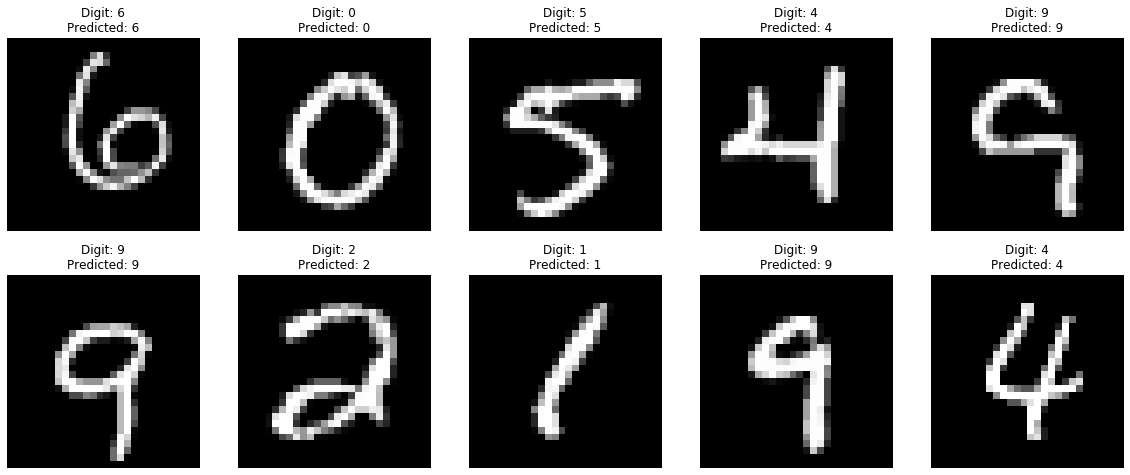

In [29]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.datasets import mnist

img_rows, img_cols = 28, 28 # number of pixels 
num_classes = 10 # 10 digits

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
X_test = X_test.astype('float32')
X_test /= 255
Y_test = keras.utils.to_categorical(Y_test, num_classes)

#load saved model
savedpath = "Saved/exercise1/modelRMSprop"
model = tf.keras.models.load_model(filepath=savedpath)
predictions = model.predict(X_test)
# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)
# print performance
print()
print('Test loss:', round(score[0],5))
print('Test accuracy:', round(score[1],5))

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#cambia valore per vedere risultati su figure differenti
n=100  #max 9990
plt.figure(figsize=(20, 8)) 
for i in range(10):    
    ax = plt.subplot(2, 5, i + 1)    
    plt.imshow(X_test[i+n, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i+n]), np.argmax(predictions[i+n])))    
    plt.axis('off')
plt.show()

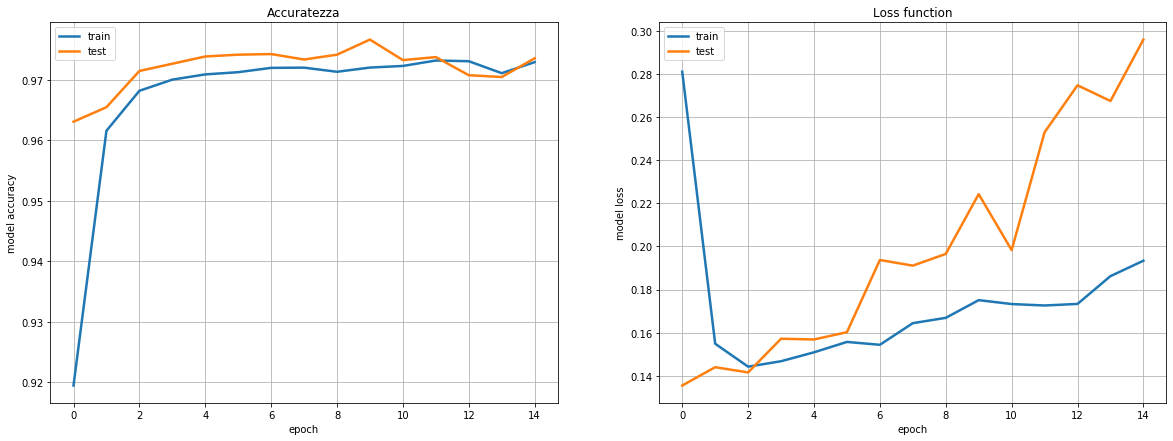

In [114]:
history = pd.read_csv('Saved/exercise1/RMSprop.log', sep=',', engine='python')
plt.figure(figsize=(20, 7))

plt.subplot(121) #summarize history for accuracy
plt.title('Accuratezza')
plt.plot(history['accuracy'], lw=2.5)
plt.plot(history['val_accuracy'], lw=2.5)
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()

plt.subplot(122)
plt.title('Loss function')
plt.plot(history['loss'], lw=2.5)  #summarize history for loss
plt.plot(history['val_loss'], lw=2.5)
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()

### <font color='blue'> Adam </font> 
Riporto qui i risultati ottenuti per il riconoscimento delle cifre modificando l'ottimizzatore in *Adam*.

313/313 [==============================] - 1s 4ms/step - loss: 0.1028 - accuracy: 0.9813

Test loss: 0.10275
Test accuracy: 0.9813


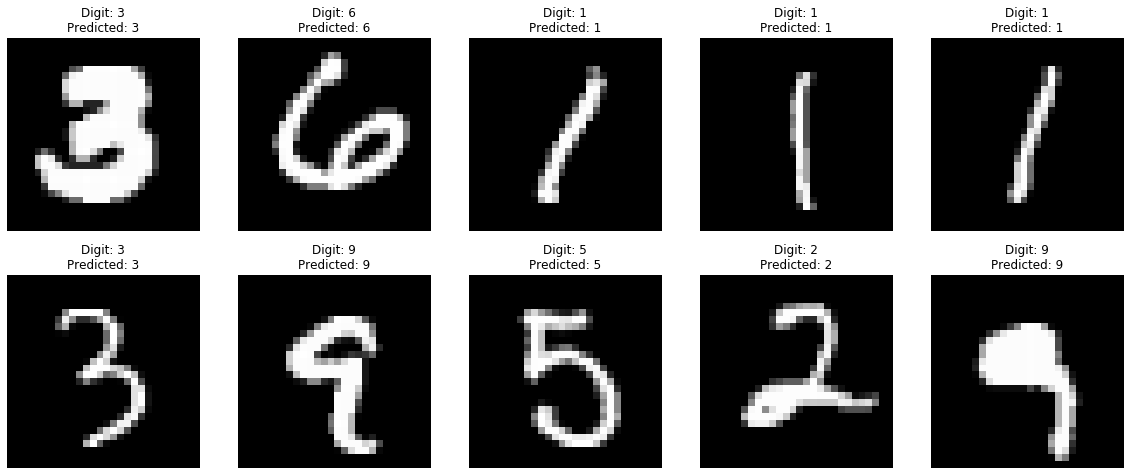

In [30]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
X_test = X_test.astype('float32')
X_test /= 255
Y_test = keras.utils.to_categorical(Y_test, num_classes)

#load saved model
savedpath = "Saved/exercise1/modelAdam"
model = tf.keras.models.load_model(filepath=savedpath)
predictions = model.predict(X_test)
# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)
# print performance
print()
print('Test loss:', round(score[0],5))
print('Test accuracy:', round(score[1],5))

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#cambia valore per vedere risultati su figure differenti
n=200  #max 9990
plt.figure(figsize=(20, 8)) 
for i in range(10):    
    ax = plt.subplot(2, 5, i + 1)    
    plt.imshow(X_test[i+n, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i+n]), np.argmax(predictions[i+n])))    
    plt.axis('off')
plt.show()

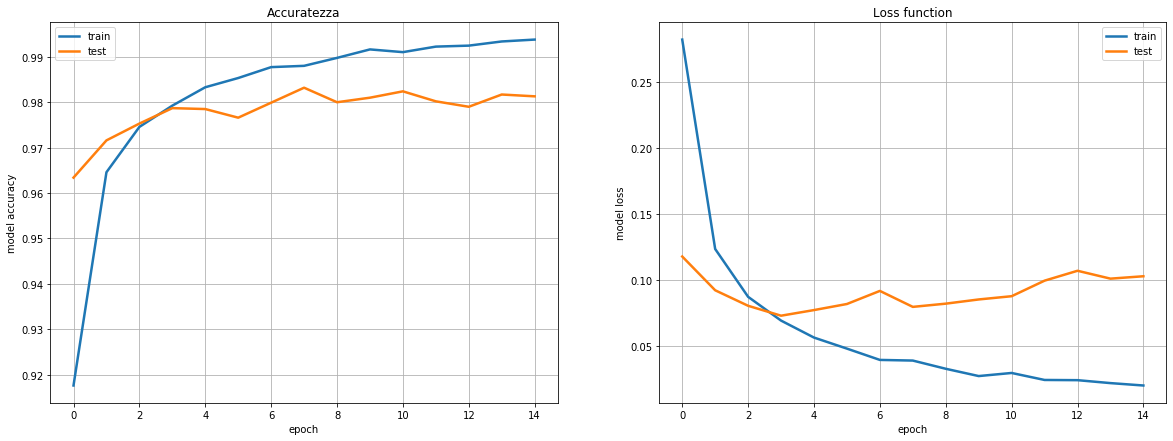

In [99]:
history = pd.read_csv('Saved/exercise1/Adam.log', sep=',', engine='python')
plt.figure(figsize=(20, 7))

plt.subplot(121) #summarize history for accuracy
plt.title('Accuratezza')
plt.plot(history['accuracy'], lw=2.5)
plt.plot(history['val_accuracy'], lw=2.5)
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()

plt.subplot(122)
plt.title('Loss function')
plt.plot(history['loss'], lw=2.5)  #summarize history for loss
plt.plot(history['val_loss'], lw=2.5)
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()

### <font color='blue'> Adagrad </font> 
Riporto qui i risultati ottenuti per il riconoscimento delle cifre modificando l'ottimizzatore in *Adagrad*.

313/313 [==============================] - 2s 6ms/step - loss: 0.1745 - accuracy: 0.9482

Test loss: 0.17452
Test accuracy: 0.9482


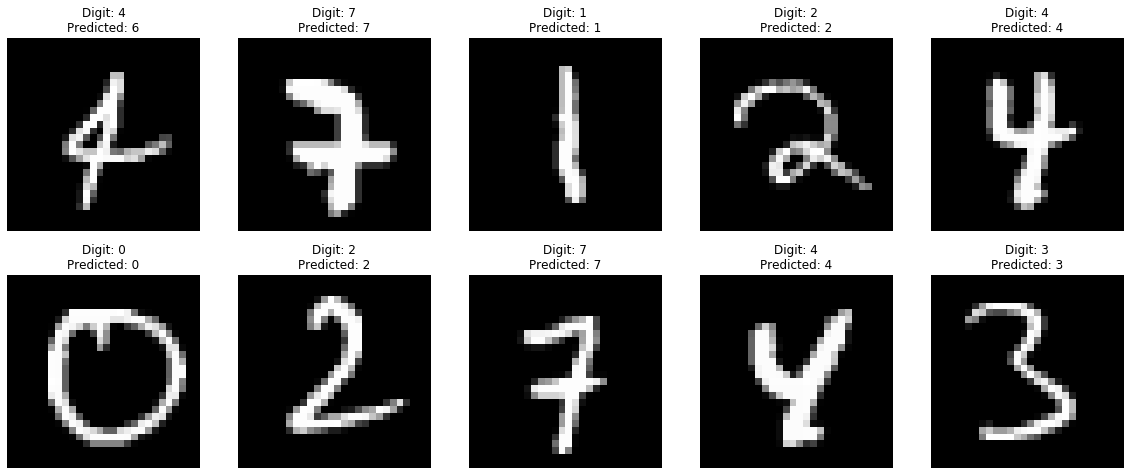

In [31]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
X_test = X_test.astype('float32')
X_test /= 255
Y_test = keras.utils.to_categorical(Y_test, num_classes)

#load saved model
savedpath = "Saved/exercise1/modelAdagrad"
model = tf.keras.models.load_model(filepath=savedpath)
predictions = model.predict(X_test)
# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)
# print performance
print()
print('Test loss:', round(score[0],5))
print('Test accuracy:', round(score[1],5))

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#cambia valore per vedere risultati su figure differenti
n=300  #max 9990
plt.figure(figsize=(20, 8)) 
for i in range(10):    
    ax = plt.subplot(2, 5, i + 1)    
    plt.imshow(X_test[i+n, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i+n]), np.argmax(predictions[i+n])))    
    plt.axis('off')
plt.show()

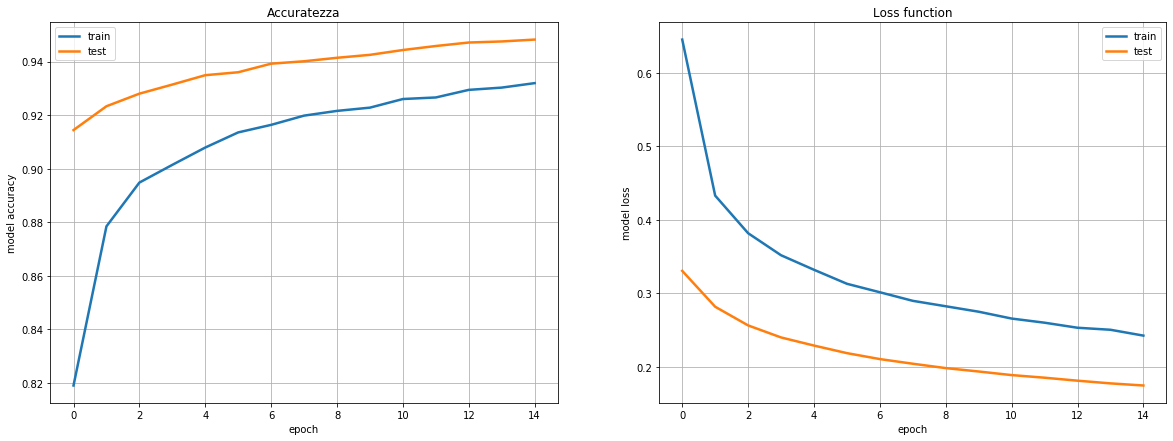

In [111]:
history = pd.read_csv('Saved/exercise1/Adagrad.log', sep=',', engine='python')
plt.figure(figsize=(20, 7))

plt.subplot(121) #summarize history for accuracy
plt.title('Accuratezza')
plt.plot(history['accuracy'], lw=2.5)
plt.plot(history['val_accuracy'], lw=2.5)
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()

plt.subplot(122)
plt.title('Loss function')
plt.plot(history['loss'], lw=2.5)  #summarize history for loss
plt.plot(history['val_loss'], lw=2.5)
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()

## Exercise 12.2

Svluppo una rete neurale convoluzionale per eseguire il riconoscimento delle cifre scritta a mano: lo specchietto seguente riporta il codice utilizzato per definire la struttura della rete neurale.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font face="Courier">model = Sequential()</font><br />
<font face="Courier">model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))</font><br />
<font face="Courier">model.add(MaxPooling2D())</font> <br />
<font face="Courier">model.add(Conv2D(16, kernel_size=(5,5), activation='relu'))</font> <br />
<font face="Courier">model.add(MaxPooling2D()</font> <br />
<font face="Courier">model.add(Flatten())</font> <br />
<font face="Courier">model.add(Dense(256, activation='relu'))</font> <br />
<font face="Courier">model.add(Dropout(0.2))</font> <br />
<font face="Courier">model.add(Dense(10, activation='softmax'))</font> <br />
<font face="Courier">model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])</font> <br />
</p>

I grafici seguenti mostrano i risultati ottenuti utilizzando iterando per $10$ epoche sulle immagini di training. Come si può osservare le predizioni della rete neurale coincidono con la cifra digitata e infatti si ottiene un'accuratezza del 98%.

313/313 [==============================] - 3s 9ms/step - loss: 0.0466 - accuracy: 0.9837

Test loss: 0.04658
Test accuracy: 0.9837


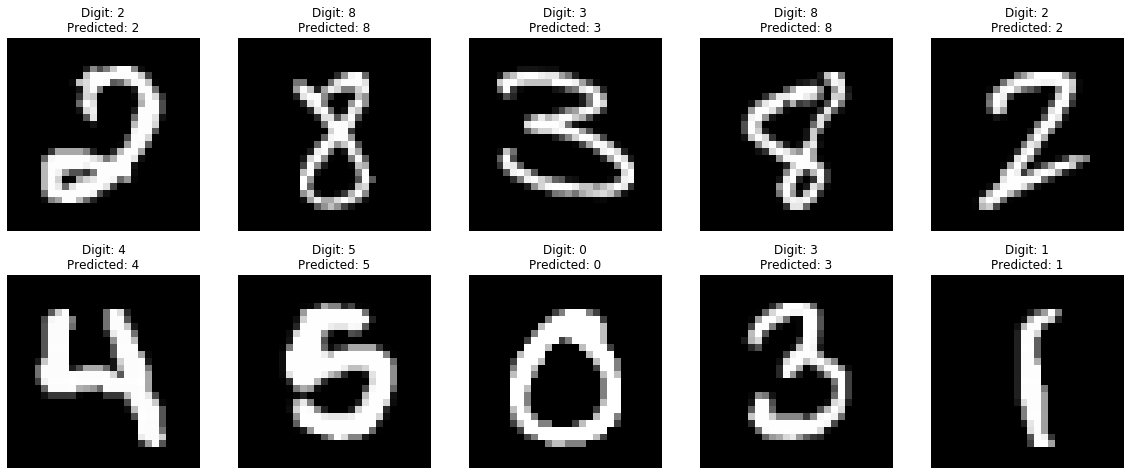

In [32]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.datasets import mnist

img_rows, img_cols = 28, 28 # number of pixels 
num_classes = 10 # 10 digits

#load test and train data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
X_test = X_test.astype('float32')
X_test /= 255
Y_test = keras.utils.to_categorical(Y_test, 10)

#load saved model
savedpath = "Saved/exercise2/modelCNN"
model = tf.keras.models.load_model(filepath=savedpath)
predictions = model.predict(X_test)
# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)
# print performance
print()
print('Test loss:', round(score[0],5))
print('Test accuracy:', round(score[1],5))

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#cambia valore per vedere risultati su figure differenti
n=400  #max 9990
plt.figure(figsize=(20, 8)) 
for i in range(10):    
    ax = plt.subplot(2, 5, i + 1)    
    plt.imshow(X_test[i+n, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i+n]), np.argmax(predictions[i+n])))    
    plt.axis('off')
plt.show()

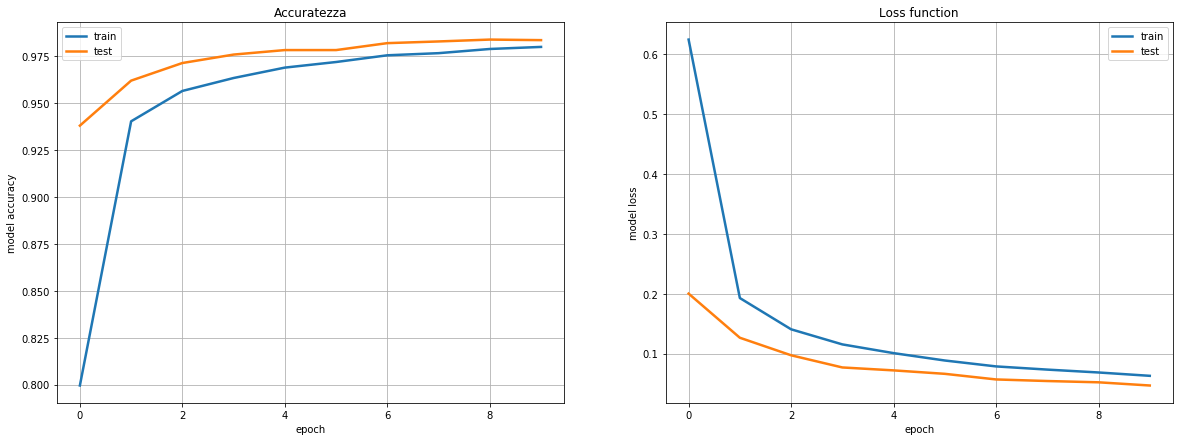

In [24]:
history = pd.read_csv('Saved/exercise2/modelCNN.log', sep=',', engine='python')
plt.figure(figsize=(20, 7))

plt.subplot(121) #summarize history for accuracy
plt.title('Accuratezza')
plt.plot(history['accuracy'], lw=2.5)
plt.plot(history['val_accuracy'], lw=2.5)
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()

plt.subplot(122)
plt.title('Loss function')
plt.plot(history['loss'], lw=2.5)  #summarize history for loss
plt.plot(history['val_loss'], lw=2.5)
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()

## Exercise 12.3
Applico la rete neurale convoluzionale testata nell'esercizio precedente per il riconoscimento di nuove cifre scritte da me. Come si può osservare la rete convoluzionale raggiunge ottimi risultati anche su immagini nuove sbagliando la predizione in una sola occasione.

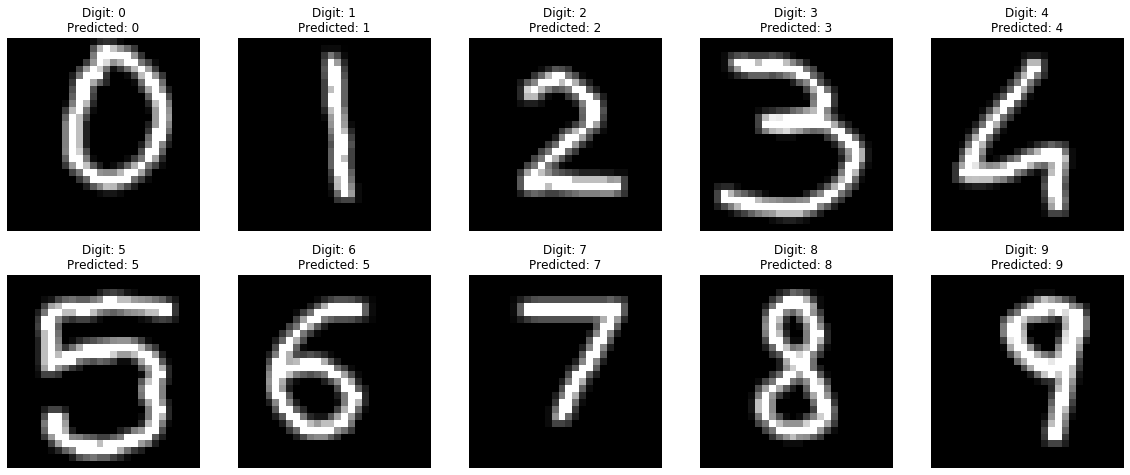

In [27]:
from PIL import Image
import os

plt.figure(figsize=(20, 8)) 

for k in range (10):
    digit_filename = "./Digit/digit" + str(k) + ".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    data = np.zeros((xdim, ydim))
    pix=digit_in.load();
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    
    data = data.reshape(1, xdim, ydim, 1)
    pred = model.predict(data)
    data = data.reshape(xdim,ydim)

    ax = plt.subplot(2, 5, k + 1)
    plt.imshow(data, cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(k, np.argmax(pred)))
    plt.axis('off') 
plt.show()